In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout


In [ ]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape


11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
def plot_input(i):

 plt.imshow(X_train[i], cmap = 'binary')
 plt.title(y_train[i])
 plt.show()

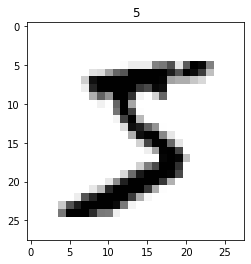

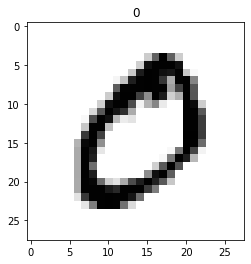

In [ ]:
for i in range (2):
  plot_input(i)

In [ ]:
X_train = X_train.astype((np.float32))/255
X_test = X_test.astype((np.float32))/255

X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

X_train.shape




(60000, 28, 28, 1)

In [ ]:
y_train =keras.utils.np_utils.to_categorical(y_train)
y_test =keras.utils.np_utils.to_categorical(y_test)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
model.compile(optimizer = 'adam', loss= keras.losses.categorical_crossentropy, metrics =['accuracy'])



In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_acc',min_delta = 0.01, patience = 4,verbose =1)
mc = ModelCheckpoint('./bestmodel.h5',monitor ='val_acc', verbose = 1, save_best_only = True)
cb = [es,mc]

In [ ]:
his = model.fit(X_train, y_train, epochs = 5,validation_split = 0.3)
model.save('bestmodel.h5')

Epoch 1/5
1313/1313 [==============================] - 45s 33ms/step - loss: 0.2041 - accuracy: 0.9369 - val_loss: 0.0762 - val_accuracy: 0.9767
Epoch 2/5
1313/1313 [==============================] - 45s 35ms/step - loss: 0.0700 - accuracy: 0.9781 - val_loss: 0.0550 - val_accuracy: 0.9829
Epoch 3/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0521 - val_accuracy: 0.9842
Epoch 4/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.0481 - val_accuracy: 0.9861
Epoch 5/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.0516 - val_accuracy: 0.9850


In [ ]:
model_S = keras.models.load_model('bestmodel.h5')

In [ ]:

score = model_S.evaluate(X_test,y_test)
print(score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0417 - accuracy: 0.9862
0.9861999750137329








 The digit predicted from the image : 9









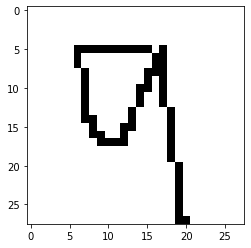

In [ ]:
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = keras.models.load_model('bestmodel.h5')
imgData = cv2.imread('nine.png')
plt.imshow(imgData)
img = cv2.imread('nine.png')[:,:,0]

img = np.invert(np.array([img]))
prediction = model.predict(img)
print("\n\n\n\n\n\n The digit predicted from the image : "+ str(np.argmax(prediction)) + "\n\n\n\n\n\n\n")







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#!pip install flask
!pip install gevent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 13.1 MB/s 
     |████████████████████████████████| 251 kB 69.4 MB/s 


In [ ]:
# from flask import Flask
# from gevent.pywsgi import WSGIServer
# app = Flask(__name__)

# @app.route('/api', methods=['GET'])
# def index():
#     return "Hello, World!"

# if __name__ == '__main__':
    
#     http_server = WSGIServer(('', 5000), app)
#     http_server.serve_forever()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.7/dist-packages/gevent/threadpool.py", line 157, in _before_run_task
    _sys.settrace(_get_thread_trace())


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.7/dist-packages/gevent/threadpool.py", line 162, in _after_run_task
    _sys.settrace(None)

KeyboardInterrupt
2022-09-12T14:48:47Z


KeyboardInterrupt: ignored